In [54]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [17]:
yr2sec = 24*3600*365.25

In [11]:
surface_hfds = xr.open_mfdataset('~/UNSW_work/ACCESS_CM2/hfds_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc')
surface_area = xr.open_mfdataset('~/UNSW_work/ACCESS_CM2/area*')
OHC = xr.open_mfdataset('~/UNSW_work/ACCESS_CM2/OHC_ACCESS_CM2_CMIP.nc')

In [52]:
hfds_integrated = ((surface_hfds.hfds*surface_area.areacello)*(yr2sec/12)).cumsum('time').sum('j').sum('i')
hfds_integrated.load()

<xarray.DataArray (time: 1980)>
array([1.4319747e+22, 2.6224199e+22, 3.0627833e+22, ..., 3.2706899e+23,
       3.4030244e+23, 3.5309187e+23], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00

In [39]:
OHC_integrated = OHC.__xarray_dataarray_variable__.isel(ensemble_member=0).isel(lev=-1)
OHC_integrated.load()

<xarray.DataArray '__xarray_dataarray_variable__' (time: 1980)>
array([2.59977719e+25, 2.60113345e+25, 2.60189363e+25, ...,
       2.66573444e+25, 2.66691887e+25, 2.66822825e+25])
Coordinates:
  * time             (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16...
    lev              float64 5.831e+03
    ensemble_member  <U8 'r1i1p1f1'

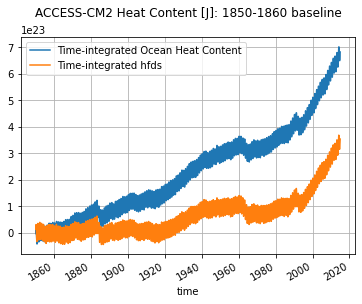

In [63]:
(OHC_integrated-OHC_integrated.isel(time=slice(0,120)).mean('time')).plot(label = 'Time-integrated Ocean Heat Content')
(hfds_integrated-hfds_integrated.isel(time=slice(0,120)).mean('time')).plot(label = 'Time-integrated hfds')
plt.title('ACCESS-CM2 Heat Content [J]: 1850-1860 baseline', pad=20)
plt.legend()
plt.savefig('../EN4_Data/Figures/hfds_nonclosure.png')
plt.grid()
plt.show()